<a href="https://www.kaggle.com/code/jasonrdaniels/credit-risk-practice-project-python?scriptVersionId=208365906" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib.pyplot as plt


/kaggle/input/credit-risk/credit.csv


# We are reviewing the credit risk dataset provided by kaggle. The goal is to determine if there are any factors within the data that indicate a higher chance of defaulting on a loan. We will review the dataset as a whole and then break it down into smaller subsets. The comparisons in this analysis will involve the following columns within the dataset: purpose of the loans, job type of the loan applicants, and credit history. 

Import dataset from kaggle and review first 5 rows.

In [2]:
df = pd.read_csv('/kaggle/input/credit-risk/credit.csv')
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


Review additional details about the dataset...

In [3]:
df.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [5]:
df.shape

(1000, 17)

In [6]:
df['purpose'].unique()

array(['furniture/appliances', 'education', 'car', 'business',
       'renovations', 'car0'], dtype=object)

it appears that within the purpose column, there are two separate values for car: car and car0. we must replace the car0 values with car to ensure proper analysis. 

In [7]:
df['purpose'].replace('car0', 'car', inplace=True)

/tmp/ipykernel_17/3289370193.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['purpose'].replace('car0', 'car', inplace=True)


In [8]:
df['purpose'].value_counts()

purpose
furniture/appliances    473
car                     349
business                 97
education                59
renovations              22
Name: count, dtype: int64

In [9]:
df['default'].value_counts()

default
no     700
yes    300
Name: count, dtype: int64

## Based on initial review, the dataset contains 1000 rows and 17 columns. There does not appear to be any nulls contained within the data. 
## Next, the dataset will be separated into two separate subsets: one where the default is 'Yes' and another where it is 'No'. From there, we can do an initial analysis to determine if there are any factors that contribute to whether a loan will default. 

In [10]:
df_default_no = df[df['default'] == 'no'] 
df_default_no.head(25)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
12,1 - 200 DM,12,good,furniture/appliances,1567,< 100 DM,1 - 4 years,1,1,22,none,own,1,skilled,1,yes,no
14,< 0 DM,15,good,car,1403,< 100 DM,1 - 4 years,2,4,28,none,rent,1,skilled,1,no,no
16,unknown,24,critical,furniture/appliances,2424,unknown,> 7 years,4,4,53,none,own,2,skilled,1,no,no


In [11]:
df_default_no['purpose'].value_counts()

purpose
furniture/appliances    349
car                     238
business                 63
education                36
renovations              14
Name: count, dtype: int64

In [12]:
df_default_yes = df[df['default'] == 'yes']
df_default_yes.head(25)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes
10,1 - 200 DM,12,good,car,1295,< 100 DM,< 1 year,3,1,25,none,rent,1,skilled,1,no,yes
11,< 0 DM,48,good,business,4308,< 100 DM,< 1 year,3,4,24,none,rent,1,skilled,1,no,yes
13,< 0 DM,24,critical,car,1199,< 100 DM,> 7 years,4,4,60,none,own,2,unskilled,1,no,yes
15,< 0 DM,24,good,furniture/appliances,1282,100 - 500 DM,1 - 4 years,4,2,32,none,own,1,unskilled,1,no,yes
18,1 - 200 DM,24,good,car,12579,< 100 DM,> 7 years,4,2,44,none,other,1,management,1,yes,yes
29,< 0 DM,60,poor,business,6836,< 100 DM,> 7 years,3,4,63,none,own,2,skilled,1,yes,yes
35,1 - 200 DM,45,critical,furniture/appliances,4746,< 100 DM,< 1 year,4,2,25,none,own,2,unskilled,1,no,yes


In [13]:
df_default_yes['purpose'].value_counts()

purpose
furniture/appliances    124
car                     111
business                 34
education                23
renovations               8
Name: count, dtype: int64

Quick comparison of the two new datasets:

In [14]:
print('Amount of loans defaulted out of 1000:' + ' ' + str(len(df_default_yes)))
print('Amount of loans not defaulted out of 1000:' + ' ' + str(len(df_default_no)))

Amount of loans defaulted out of 1000: 300
Amount of loans not defaulted out of 1000: 700


## Out of the 1000 total loans in the dataset, 300 were defaulted. Now we can look into the defaulted loans more closely to determine if there are any common features of the loans or applicants that lead to default.

## Loan purpose:

In [15]:
x = list(df['purpose'].unique())
y = []

for i in x:
    y.append(df['purpose'].value_counts()[i])

print(y)

[473, 59, 349, 97, 22]


In [16]:
defaults_y = []
for i in x:
    defaults_y.append(df_default_yes['purpose'].value_counts()[i])

non_defaults_y = []
for i in x:
    non_defaults_y.append(df_default_no['purpose'].value_counts()[i])

print(x)
print(defaults_y)
print(non_defaults_y)

['furniture/appliances', 'education', 'car', 'business', 'renovations']
[124, 23, 111, 34, 8]
[349, 36, 238, 63, 14]


Side by side comparison:

Text(0.5, 1.0, 'Non-Defaulted Loans by Purpose')

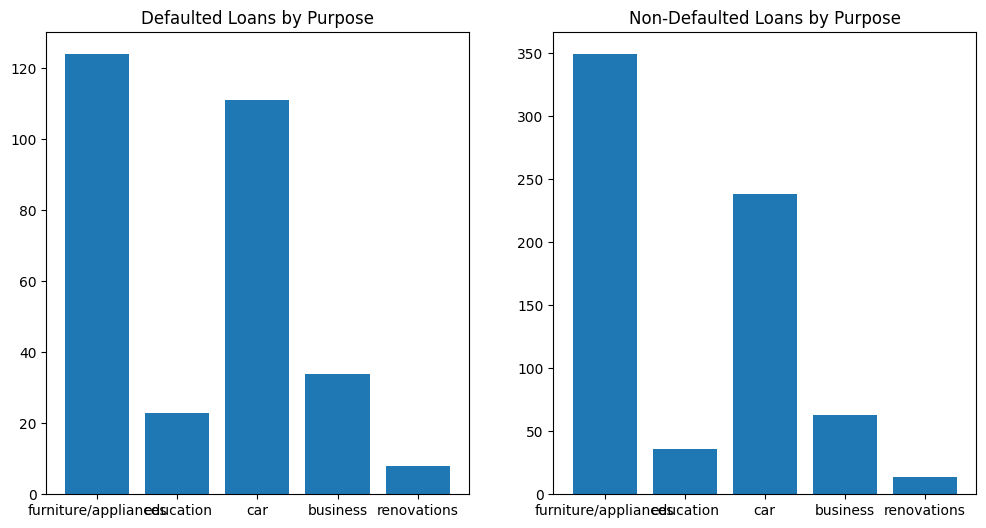

In [17]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.bar(x, defaults_y)
plt.title('Defaulted Loans by Purpose')

plt.subplot(1,2,2)
plt.bar(x, non_defaults_y)
plt.title('Non-Defaulted Loans by Purpose')

This side by side comparison of defaulted and non-defaulted loans by purpose doesn't do a good job of illustrating the difference. We will need to stack the defaulted loans on top of total loans to determine if anything stands out.

## To see a ratio of each purpose and the level of default, we create a new plot (stacked bar). This illustrates the amount of defaulted loans by purpose as a part of the total loans given for each purpose. We can see that although the defaults for furniture/appliances and cars are higher than other purposes, they do not default at a higher percentage than education and renovation loans. 

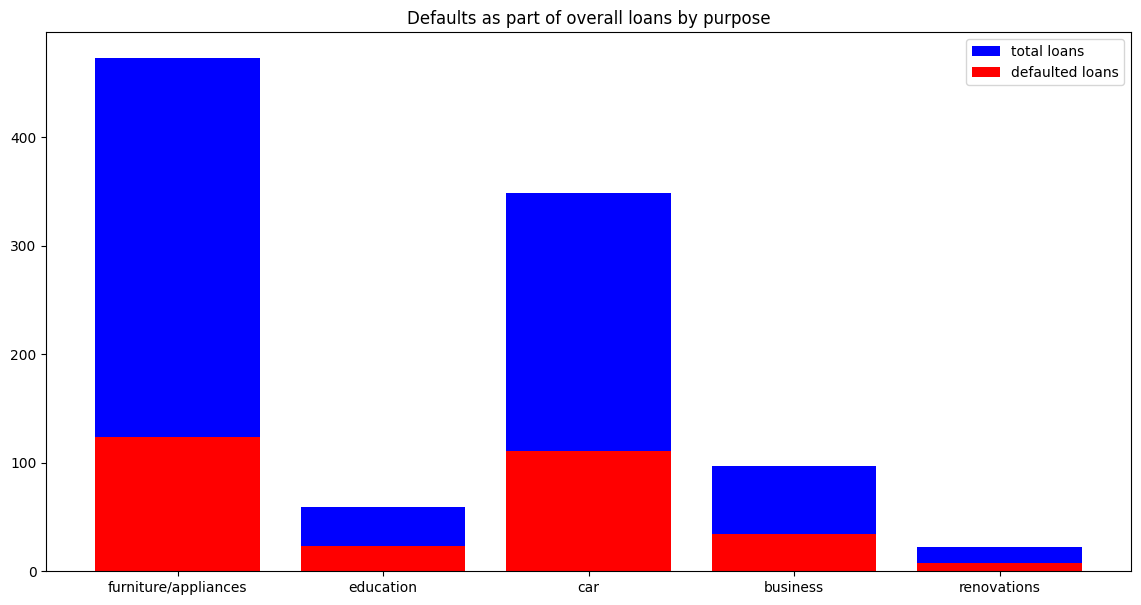

In [18]:
plt.figure(figsize = (14,7))
plt.bar(x, y, color='b', label = 'total loans')
plt.bar(x, defaults_y, color='r', label = 'defaulted loans')
plt.title('Defaults as part of overall loans by purpose')
plt.legend(loc='upper right')
plt.show()

## We can do now plot the same stacked bar chart for other columns to determine how many defaults occur.

Job type:

In [19]:
job_x = list(df['job'].unique())
job_y = []

for i in job_x:
    job_y.append(df['job'].value_counts()[i])

In [20]:
job_y_default = []

for i in job_x:
    job_y_default.append(df_default_yes['job'].value_counts()[i])

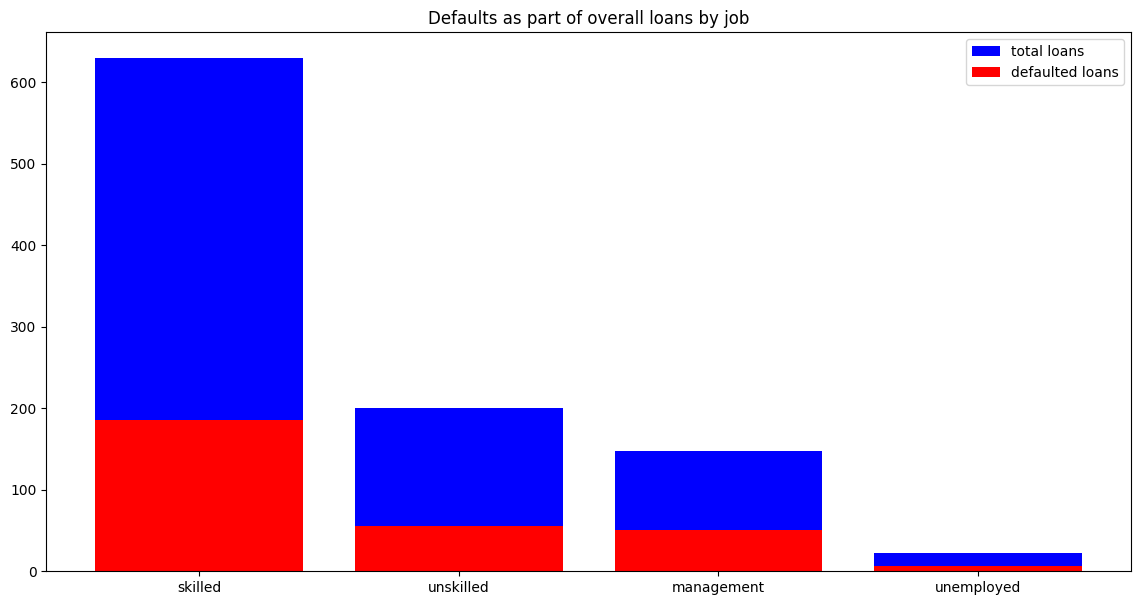

In [21]:
plt.figure(figsize = (14,7))
plt.bar(job_x, job_y, color='b', label = 'total loans')
plt.bar(job_x, job_y_default, color='r', label = 'defaulted loans')
plt.title('Defaults as part of overall loans by job')
plt.legend(loc='upper right')
plt.show()

Credit Rating:

In [22]:
credit_history_x = ['perfect', 'very good', 'good', 'poor', 'critical']
credit_history_y = []

for i in credit_history_x:
    credit_history_y.append(df['credit_history'].value_counts()[i])

In [23]:
credit_history_defaults = []

for i in credit_history_x:
    credit_history_defaults.append(df_default_yes['credit_history'].value_counts()[i])

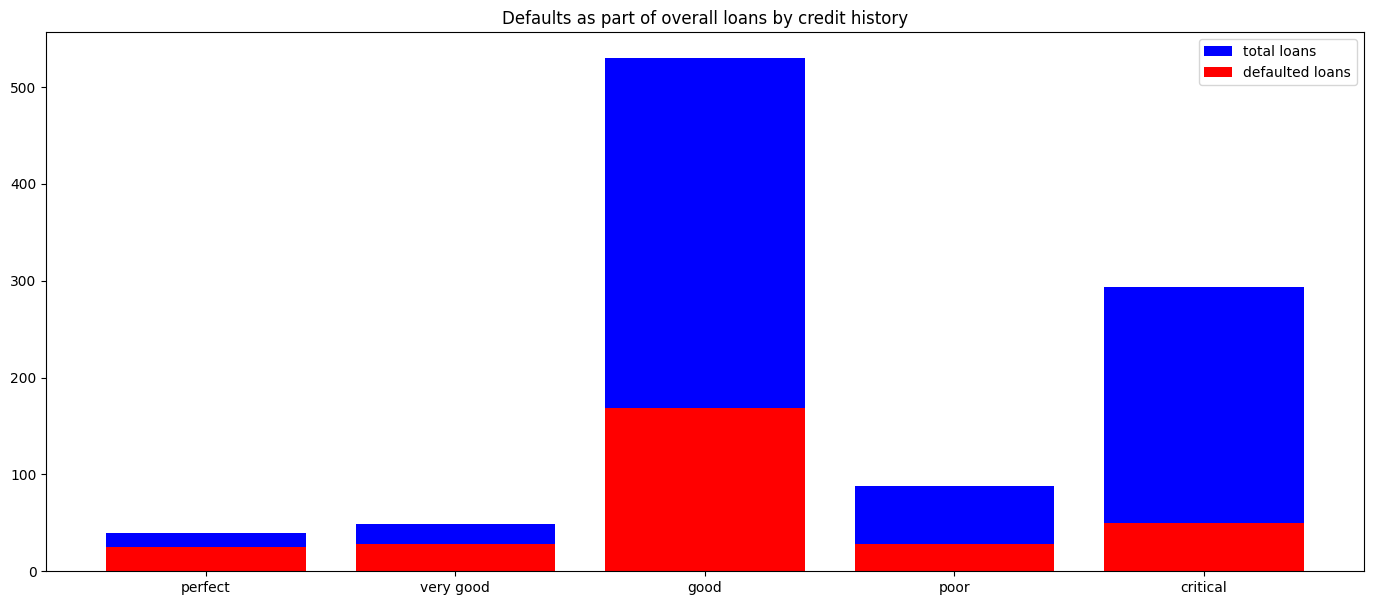

In [24]:
plt.figure(figsize=(17,7))
plt.bar(credit_history_x, credit_history_y, color='b', label='total loans')
plt.bar(credit_history_x, credit_history_defaults, color='r', label='defaulted loans')
plt.legend(loc='upper right')
plt.title('Defaults as part of overall loans by credit history')
plt.show()

The bar plot showing the total amount of loans given to each credit history type (blue) with the amount of defaults for each credit history type (red) shows somewhat surprising results. By far, the most loans are given to people with good and critical credit, while a much lower amount of loans are given for the other credit ratings (perfect, very good, and poor). The other surprising finding is that loans given to both perfect and very good credit customers default at a much higher rate than the other credit history levels. Based on this dataset, it is safe to say that individuals with better credit history are not necessarily less prone to defaulting on loans. 